In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
train = pd.read_csv("../Datasets/Initial dataset/train.csv")
test = pd.read_csv("../Datasets/Initial dataset/test.csv")
game_details = pd.read_csv("../Datasets/Initial dataset/game_overview.csv")

In [10]:
train

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


## Data Analysis & Visualization

### Missing values

We noticed that *year* column contains missing values. We'll see later if this column is significant or not for the prediction.

A first intuition would tell us that the year of a user's review would not have a great influence on the analysis of the review, so we'll skip that for the moment. 

In [9]:
train.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [10]:
test.isnull().sum()

review_id       0
title           0
year           67
user_review     0
dtype: int64

In [11]:
game_details.isnull().sum()

title        0
developer    0
publisher    0
tags         0
overview     0
dtype: int64

### Class Balance

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


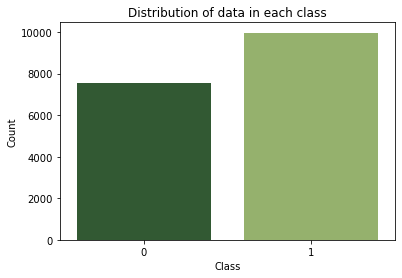

In [39]:
sns.countplot(train['user_suggestion'],  palette=['#2C5F2D',"#97BC62FF"])
plt.xlabel('Class')
plt.title('Distribution of data in each class')
plt.ylabel('Count')
plt.show()

### Most Common Words for User Suggestion

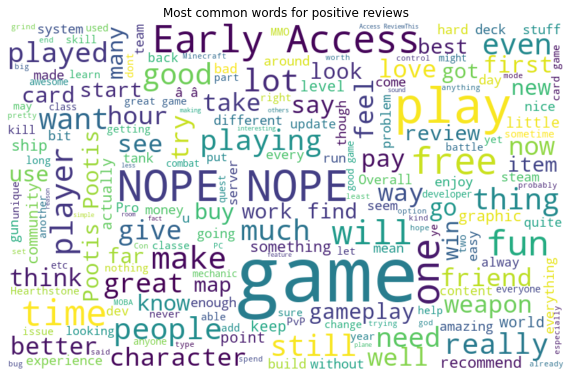

In [21]:
positive_words = ' '.join([text for text in train['user_review'][train['user_suggestion'] == 1]])
wordcloud = WordCloud(background_color='white', width=800, height=500,random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words for positive reviews")
plt.show()

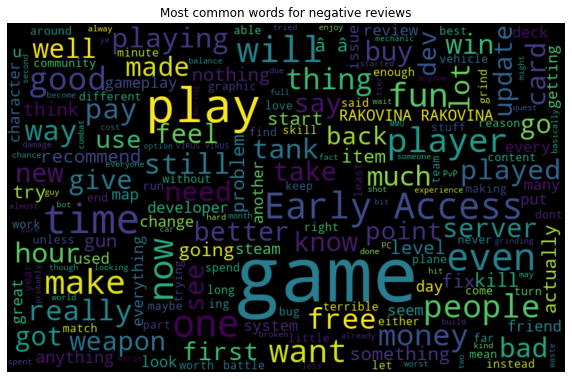

In [23]:
negative_words = ' '.join([text for text in train['user_review'][train['user_suggestion'] == 0]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words for negative reviews")
plt.show()

### Analyzing *Year* and *Title* features from User Suggestion perspective

Text(0.5, 1.0, 'Count of User Suggestion in Year Feature')

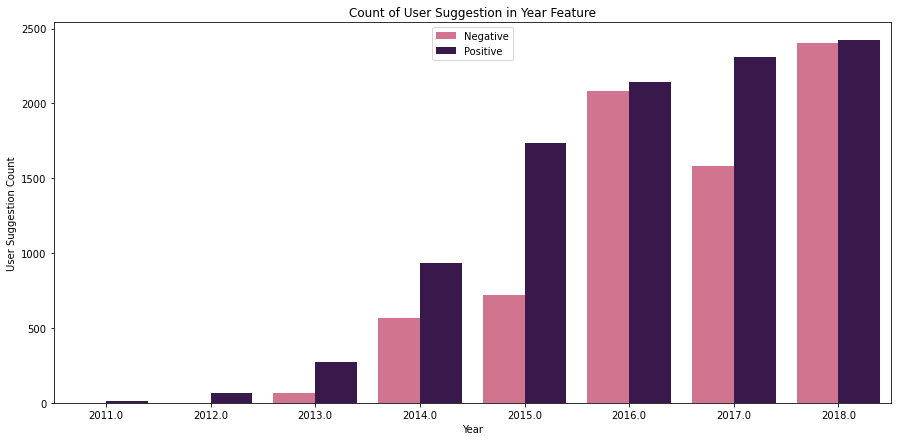

In [47]:
plt.figure(figsize = (15, 7))
sns.countplot(x=train['year'], hue='user_suggestion', data=train, palette=['#DF6589FF',"#3C1053FF"])
    
plt.xlabel('Year')
plt.ylabel('User Suggestion Count')    
plt.tick_params(axis='x')
plt.tick_params(axis='y')
    
plt.legend(['Negative', 'Positive'], loc='upper center')
plt.title('Count of User Suggestion in Year Feature')

After a quick overview of this dataset, we can see that 2018 reviews were both negative and positive. Obviously, in each year it can be noticed that the reviews are mostly positive for Steam games.

Text(0.5, 1.0, 'Count of User Suggestion in Title Feature')

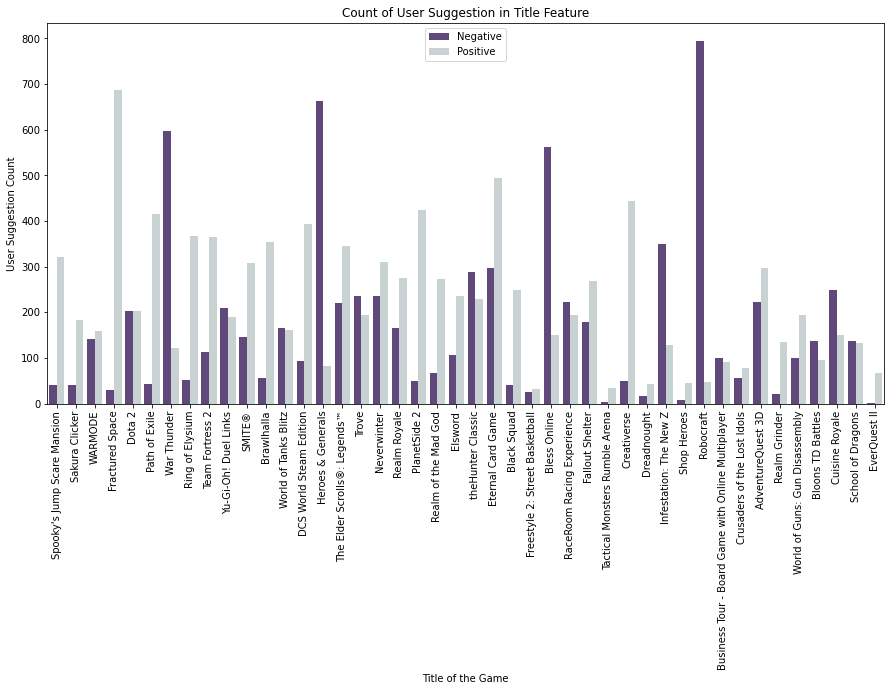

In [45]:
plt.figure(figsize = (15, 7))
sns.countplot(x=train['title'], hue='user_suggestion', data=train, palette=['#603F83FF',"#C7D3D4FF"])
    
plt.xlabel('Title of the Game')
plt.ylabel('User Suggestion Count')    
plt.tick_params(axis='x')
plt.xticks(rotation=90)
plt.tick_params(axis='y')
    
plt.legend(['Negative', 'Positive'], loc='upper center')
plt.title('Count of User Suggestion in Title Feature')

### Merge Train & Test datasets with Game Overview dataset

We'll merge train & test datasets with game overview dataset. In this way, we have a full dataset containing both the reviews and game details as well and we can continue training on a single dataset.

We'll save the datasets created.

In [59]:
full_train_dataset = pd.merge(train, game_details, on = "title", how = "left")
full_test_dataset = pd.merge(test, game_details, on = "title", how = "left")

full_train_dataset.to_csv("train_ds.csv", index = None)
full_test_dataset.to_csv("test_ds.csv", index = None)